In [0]:
# For connection with google drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import tensorflow.python.keras
from tensorflow.python.keras.layers import Input, Dense, LSTM, RepeatVector, TimeDistributed
from tensorflow.python.keras.models import Model, Sequential
from tensorflow.python.keras.preprocessing import image
from matplotlib import pyplot as plt

import numpy as np
import glob

np.random.seed(1000)
tensorflow.compat.v1.disable_eager_execution()

In [0]:
recurrent_encoder = Sequential([
  LSTM(100, input_shape=(32, 16), activation='relu', return_sequences=True),
  LSTM(20, activation='relu')
])

recurrent_decoder = Sequential([
  RepeatVector(32, input_shape=[20]),
  LSTM(100, return_sequences=True, activation='relu'),
  TimeDistributed(Dense(16, activation="sigmoid"))
])

recurrent_ae = Sequential([recurrent_encoder, recurrent_decoder])
recurrent_decoder.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
repeat_vector_4 (RepeatVecto (None, 32, 20)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 32, 100)           48400     
_________________________________________________________________
time_distributed_4 (TimeDist (None, 32, 16)            1616      
Total params: 50,016
Trainable params: 50,016
Non-trainable params: 0
_________________________________________________________________


In [0]:
train_images = []
count = 1
paths = glob.glob("drive/My Drive/messages/train/*/*.png", recursive=True)

for path in paths:
    test_image = image.load_img(path, target_size = (16, 16), color_mode="grayscale")
    test_image = image.img_to_array(test_image).reshape((16, 16))
    test_image = np.expand_dims(test_image, axis = 0)
    # test_image = preprocess_input(test_image)
    train_images.append(test_image.astype('float32') / 255)
    # print(count)
    count += 1

In [0]:
x_train = np.vstack(train_images)
print(x_train.shape)

(1, 16, 16)


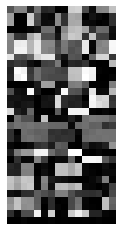

(1, 32, 16)


In [0]:
test_image = image.load_img("drive/My Drive/normal.jpeg", target_size = (32, 16), color_mode="grayscale")
test_image = image.img_to_array(test_image).reshape((32, 16))
# test_image = np.pad(test_image, ((0, 0), (8, 8)), 'constant', constant_values=((0, 0), (255, 255)))

plt.imshow(test_image, cmap='gray')
plt.axis('off')
plt.show()

test_image = np.expand_dims(test_image, axis = 0)
test_image = test_image.astype('float32') / 255

print(test_image.shape)

In [0]:
recurrent_ae.compile(optimizer='adam', loss='mse')


recurrent_ae.fit(test_image, test_image,
                epochs=800)

Train on 1 samples
Epoch 1/800
1/1 [==============================] - 0s 2ms/sample - loss: 0.1255
Epoch 2/800
1/1 [==============================] - 0s 2ms/sample - loss: 0.1248
Epoch 3/800
1/1 [==============================] - 0s 2ms/sample - loss: 0.1243
Epoch 4/800
1/1 [==============================] - 0s 2ms/sample - loss: 0.1237
Epoch 5/800
1/1 [==============================] - 0s 2ms/sample - loss: 0.1231
Epoch 6/800
1/1 [==============================] - 0s 2ms/sample - loss: 0.1223
Epoch 7/800
1/1 [==============================] - 0s 3ms/sample - loss: 0.1213
Epoch 8/800
1/1 [==============================] - 0s 2ms/sample - loss: 0.1200
Epoch 9/800
1/1 [==============================] - 0s 2ms/sample - loss: 0.1183
Epoch 10/800
1/1 [==============================] - 0s 2ms/sample - loss: 0.1160
Epoch 11/800
1/1 [==============================] - 0s 2ms/sample - loss: 0.1127
Epoch 12/800
1/1 [==============================] - 0s 2ms/sample - loss: 0.1075
Epoch 13/800
1/1 [

In [0]:
predict_images = []

test_image = image.load_img("drive/My Drive/malicious.jpeg", target_size = (32, 16), color_mode="grayscale")
test_image = image.img_to_array(test_image).reshape((32, 16))
# test_image = np.pad(test_image, ((0, 0), (8, 8)), 'constant', constant_values=((0, 0), (255, 255)))

# test_image = image.load_img("drive/My Drive/messages/test/d/1668.png", target_size = (16, 16), color_mode="grayscale")
# test_image = image.load_img("drive/My Drive/iconfinder_Radiation_132691.png", target_size = (16, 16), color_mode="grayscale")
# test_image = image.img_to_array(test_image).reshape((16, 16))
test_image = np.expand_dims(test_image, axis = 0)
normalized = test_image.astype('float32') / 255
predict_images.append(normalized)

test_image = np.vstack(predict_images)

res = recurrent_ae.predict(test_image)

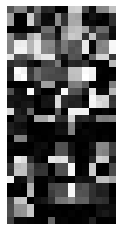

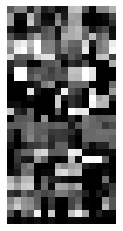

MSE Error: 0.070


In [0]:
img1 = normalized.reshape((32,16))
img2 = res.reshape((32,16))

plt.imshow(img1, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(img2, cmap='gray')
plt.axis('off')
plt.show()

mse = np.square(img1-img2).mean()
print("MSE Error: {0:.3f}".format(mse))

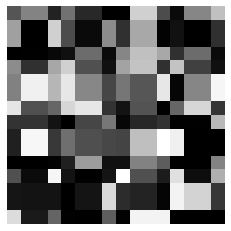

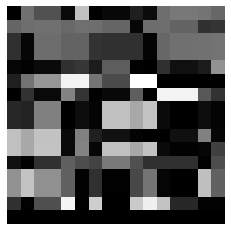

In [0]:
im1 = image.load_img("drive/My Drive/messages/test/c/1376.png", target_size = (16, 16), color_mode="grayscale")
im1 = image.img_to_array(im1).reshape((16, 16))

im2 = image.load_img("drive/My Drive/messages/test/d/1375.png", target_size = (16, 16), color_mode="grayscale")
im2 = image.img_to_array(im2).reshape((16, 16))

plt.imshow(im1, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(im2, cmap='gray')
plt.axis('off')
plt.show()
